<a href="https://colab.research.google.com/github/anchitshrivastava/Food-Non-Food-classification/blob/main/Food_nonfood_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello")

hello


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd Tatras\ projects

/content/drive/MyDrive/Tatras projects


In [ ]:
ls

'Food Nonfood data '/   sample.csv


In [ ]:
cd Food\ Nonfood\ data\ 

/content/drive/MyDrive/Tatras projects/Food Nonfood data 


In [ ]:
cd training/

/content/drive/MyDrive/Tatras projects/Food Nonfood data /training


In [ ]:
# Reached till data

In [ ]:
# Loading Train and test images data

In [ ]:
import pandas as pd
import os
import glob
from tqdm import tqdm
df_training = pd.DataFrame(columns = ['Image','Food/Non-Food'])
print(df_training)
#appending names of these files in the csv file with lables food or nonfood 
training_direc = os.getcwd()
print(training_direc)

# for food directory
food_direc = training_direc+"/food/"
nonfood_direc = training_direc+"/non_food/"
print(food_direc)
print(nonfood_direc)

Empty DataFrame
Columns: [Image, Food/Non-Food]
Index: []
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/non_food/


In [ ]:
list_food_items = [f for f in tqdm(glob.glob(food_direc+"*.jpg"))]
list_nonfood_items = [f for f in tqdm(glob.glob(nonfood_direc+"*.jpg"))]
print(len(list_food_items),len(list_nonfood_items))
df_training['Image'] = list_food_items + list_nonfood_items
for i in range(len(df_training['Image'])):
  if df_training['Image'][i] in list_food_items:
    df_training['Food/Non-Food'][i] = 1
  else:
    df_training['Food/Non-Food'][i] = 0
df_training
# 1 is for food images and 0 is for non-fod images

100%|██████████| 1500/1500 [00:00<00:00, 426365.95it/s]


1500 1500


,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,1
1,/content/drive/MyDrive/Tatras projects/Food No...,1
2,/content/drive/MyDrive/Tatras projects/Food No...,1
3,/content/drive/MyDrive/Tatras projects/Food No...,1
4,/content/drive/MyDrive/Tatras projects/Food No...,1
...,...,...
2995,/content/drive/MyDrive/Tatras projects/Food No...,0
2996,/content/drive/MyDrive/Tatras projects/Food No...,0
2997,/content/drive/MyDrive/Tatras projects/Food No...,0
2998,/content/drive/MyDrive/Tatras projects/Food No...,0


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
train_image = []
for i in tqdm(range(df_training.shape[0])):
    img = image.load_img(df_training['Image'][i], target_size=(28,28,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
X

100%|██████████| 3000/3000 [00:26<00:00, 111.29it/s]


array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
X.shape

(3000, 28, 28, 3)

In [ ]:
y=df_training['Food/Non-Food'].values
y = np.asarray(y).astype('int')
y.shape

(3000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape

(2400, 28, 28, 3)

In [ ]:
y_train.shape

(2400,)

#Sequential Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
print(X.shape)
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T
print(X_train,X_test)
X_train.shape

(2, 3)
[[[[0.49019608 0.45882353 0.4509804 ]
   [0.49803922 0.47058824 0.44705883]
   [0.5058824  0.4862745  0.47058824]
   ...
   [0.5137255  0.5294118  0.4745098 ]
   [0.5058824  0.5176471  0.4745098 ]
   [0.5019608  0.50980395 0.45882353]]

  [[0.5176471  0.49019608 0.46666667]
   [0.53333336 0.5019608  0.49019608]
   [0.6666667  0.6509804  0.64705884]
   ...
   [0.5529412  0.5647059  0.5294118 ]
   [0.53333336 0.54509807 0.5019608 ]
   [0.53333336 0.5411765  0.49019608]]

  [[0.9882353  0.9647059  0.9647059 ]
   [0.9882353  0.9764706  0.95686275]
   [0.9647059  0.9647059  0.93333334]
   ...
   [0.9882353  0.9882353  0.98039216]
   [0.9882353  0.9843137  0.9764706 ]
   [0.69411767 0.7019608  0.64705884]]

  ...

  [[0.61960787 0.58431375 0.54901963]
   [0.63529414 0.59607846 0.56078434]
   [0.6313726  0.59607846 0.56078434]
   ...
   [0.627451   0.5921569  0.5647059 ]
   [0.5137255  0.45490196 0.44313726]
   [0.12156863 0.11764706 0.10196079]]

  [[0.41960785 0.3764706  0.3529412 ]


(2400, 28, 28, 3)

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
75/75 [==============================] - 9s 103ms/step - loss: 0.0000e+00 - accuracy: 0.4849 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 2/10
75/75 [==============================] - 7s 94ms/step - loss: 0.0000e+00 - accuracy: 0.5013 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 3/10
75/75 [==============================] - 7s 94ms/step - loss: 0.0000e+00 - accuracy: 0.4824 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 4/10
75/75 [==============================] - 7s 95ms/step - loss: 0.0000e+00 - accuracy: 0.5063 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 5/10
75/75 [==============================] - 7s 94ms/step - loss: 0.0000e+00 - accuracy: 0.4843 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 6/10
75/75 [==============================] - 7s 95ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 7/10
75/75 [==============================] - 7s 93ms/step - loss: 0.0000e+00 - accuracy: 0.4984 - 

In [ ]:
# https://www.datasciencecentral.com/profiles/blogs/how-to-choose-a-machine-learning-model-some-guidelines. delete after reading 

#Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [ ]:
train_set_x = X_train.reshape(X_train.shape[0],-1).T
test_set_x = X_test.reshape(X_test.shape[0],-1).T
print(train_set_x.shape)
print(test_set_x.shape)
train_set_x

(2352, 2400)
(2352, 600)


array([[0.49019608, 0.43529412, 0.07450981, ..., 0.9411765 , 0.28235295,
        0.26666668],
       [0.45882353, 0.2       , 0.07450981, ..., 0.61960787, 0.13725491,
        0.09411765],
       [0.4509804 , 0.05882353, 0.06666667, ..., 0.03921569, 0.0627451 ,
        0.08235294],
       ...,
       [0.01568628, 0.34509805, 0.5058824 , ..., 0.76862746, 0.38039216,
        0.99215686],
       [0.03529412, 0.25490198, 0.47058824, ..., 0.5176471 , 0.3647059 ,
        0.99607843],
       [0.04705882, 0.31764707, 0.4509804 , ..., 0.23921569, 0.31764707,
        0.93333334]], dtype=float32)

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [ ]:

def propagate(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = -1./m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                               # compute cost

    dw = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*(np.sum(A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [ ]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
 
        grads, cost = propagate(w, b, X, Y)


        dw = grads["dw"]
        db = grads["db"]

        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):

    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X)+b)

    
    for i in range(A.shape[1]):

        if(A[0,i]<0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

  
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

This cell below is to be ignored

In [ ]:
y_train
#of no use
y_train1 = []
for n, i in enumerate(y_train):
  if i == 1:
    y_train1.append('food')
  else:
    y_train1.append('nonfood')
print(y_train1)
y_test1 = []
for n, i in enumerate(y_test):
  if i == 1:
    y_test1.append('food')
  else:
    y_test1.append('nonfood')
print(y_test1)

['food', 'food', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food'

In [ ]:
d = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.546121
Cost after iteration 200: 0.514202
Cost after iteration 300: 0.498969
Cost after iteration 400: 0.488922
Cost after iteration 500: 0.481159
Cost after iteration 600: 0.474658
Cost after iteration 700: 0.468979
Cost after iteration 800: 0.463895
Cost after iteration 900: 0.459276
Cost after iteration 1000: 0.455036
Cost after iteration 1100: 0.451113
Cost after iteration 1200: 0.447460
Cost after iteration 1300: 0.444043
Cost after iteration 1400: 0.440830
Cost after iteration 1500: 0.437797
Cost after iteration 1600: 0.434926
Cost after iteration 1700: 0.432198
Cost after iteration 1800: 0.429599
Cost after iteration 1900: 0.427116
train accuracy: 81.625 %
test accuracy: 78.16666666666667 %


In [ ]:
from keras.preprocessing.image import load_img , img_to_array
pic = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/100.jpg")

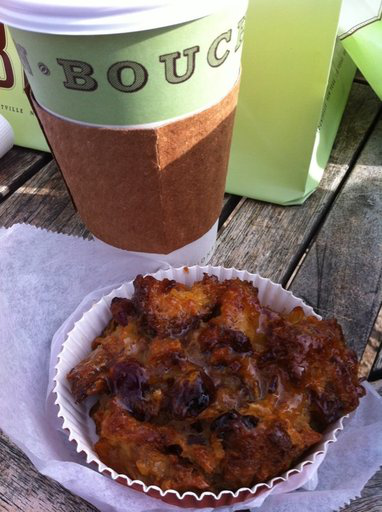

In [ ]:
pic

In [ ]:
pic.getpixel

<bound method Image.getpixel of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x7FE910761950>>

In [ ]:
pic_array = img_to_array(pic)

In [ ]:
pic_array

array([[[ 46.,  46.,  46.],
        [ 58.,  61.,  66.],
        [ 38.,  48.,  57.],
        ...,
        [166., 204., 225.],
        [185., 223., 244.],
        [201., 239., 255.]],

       [[ 52.,  52.,  54.],
        [ 47.,  52.,  56.],
        [ 29.,  42.,  50.],
        ...,
        [155., 193., 212.],
        [156., 193., 212.],
        [186., 223., 242.]],

       [[ 55.,  56.,  58.],
        [ 44.,  49.,  53.],
        [ 34.,  47.,  55.],
        ...,
        [ 88., 125., 143.],
        [138., 175., 193.],
        [153., 190., 208.]],

       ...,

       [[219., 236., 243.],
        [220., 237., 244.],
        [220., 237., 244.],
        ...,
        [154., 161., 167.],
        [153., 160., 166.],
        [154., 162., 165.]],

       [[220., 237., 244.],
        [221., 238., 245.],
        [221., 238., 245.],
        ...,
        [156., 163., 169.],
        [155., 163., 166.],
        [155., 163., 166.]],

       [[222., 239., 246.],
        [222., 239., 246.],
        [222., 2

In [ ]:
pic_array.shape

(384, 512, 3)

# ResNet

In [ ]:
import tensorflow as tf

In [ ]:
for i in range(len(df_training['Image'])):
  if df_training['Food/Non-Food'][i] == 1:
    df_training['Food/Non-Food'][i] = 'Food'
  else:
    df_training['Food/Non-Food'][i] = 'Non-Food'
  # df_training['Image'][i] = df_training['Image'][i].split("/")[8]
df_training

,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,Food
1,/content/drive/MyDrive/Tatras projects/Food No...,Food
2,/content/drive/MyDrive/Tatras projects/Food No...,Food
3,/content/drive/MyDrive/Tatras projects/Food No...,Food
4,/content/drive/MyDrive/Tatras projects/Food No...,Food
...,...,...
2995,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2996,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2997,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2998,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food


In [ ]:
df_training['Image'][0].split("/")[8]

'1287.jpg'

In [ ]:
import pandas as pd
import os
import glob
from tqdm import tqdm
df_validation = pd.DataFrame(columns = ['Image','Food/Non-Food'])
print(df_validation)
#appending names of these files in the csv file with lables food or nonfood 
validation_direc = '/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation'
print(validation_direc)

# for food directory
food_direcval = validation_direc+"/food/"
nonfood_direcval = validation_direc+"/non_food/"
print(food_direcval)
print(nonfood_direcval)

list_food_items = [f for f in tqdm(glob.glob(food_direcval+"*.jpg"))]
list_nonfood_items = [f for f in tqdm(glob.glob(nonfood_direcval+"*.jpg"))]
print(len(list_food_items),len(list_nonfood_items))
df_validation['Image'] = list_food_items + list_nonfood_items
for i in range(len(df_validation['Image'])):
  if df_validation['Image'][i] in list_food_items:
    df_validation['Food/Non-Food'][i] = 'Food'
  else:
    df_validation['Food/Non-Food'][i] = 'Non-Food'
df_validation
# 1 is for food images and 0 is for non-fod images

Empty DataFrame
Columns: [Image, Food/Non-Food]
Index: []
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/food/
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/non_food/


100%|██████████| 500/500 [00:00<00:00, 386500.55it/s]

500 500


,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,Food
1,/content/drive/MyDrive/Tatras projects/Food No...,Food
2,/content/drive/MyDrive/Tatras projects/Food No...,Food
3,/content/drive/MyDrive/Tatras projects/Food No...,Food
4,/content/drive/MyDrive/Tatras projects/Food No...,Food
...,...,...
995,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
996,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
997,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
998,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


# train_generator = train_datagen.flow_from_dataframe(
#     df_training,
#     directory='/content/drive/MyDrive/Tatras projects/Food Nonfood data /training',
#     x_col='Image',
#     y_col='Food/Non-Food',
#     classes = ['food','non-food'],
#     target_size=(224, 224),
#     batch_size = 10
# )
train_generator = train_datagen.flow_from_dataframe(
    df_training,
    directory='/content/drive/MyDrive/Tatras projects/Food Nonfood data /training',
    x_col='Image',
    y_col='Food/Non-Food',
    class_mode='binary',
    target_size=(224, 224)
)
val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 
val_generator = train_datagen.flow_from_dataframe(
    df_validation,
    directory='/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation',
    x_col='Image',
    y_col='Food/Non-Food',
    class_mode='binary',
    target_size=(224, 224)
)

Found 3000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import Xception

feature_extractor = Xception(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)
feature_extractor.trainable = False

input_ = tf.keras.Input(shape=(224, 224, 3))

x = feature_extractor(input_, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(input_, output_)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(train_generator, epochs=20, validation_data=val_generator)

model.save('./cnn_food_model')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
94/94 [==============================] - ETA: 0s - loss: 1.2965 - accuracy: 0.6543

In [ ]:
from tensorflow.keras.applications import ResNet50

feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)
feature_extractor.trainable = False

input_ = tf.keras.Input(shape=(224, 224, 3))

x = feature_extractor(input_, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(input_, output_)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(train_generator, epochs=20, validation_data=val_generator)

model.save('./resnet50_food_model')

94773248/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
94/94 [==============================] - 1121s 12s/step - loss: 0.2596 - accuracy: 0.8883 - val_loss: 0.1385 - val_accuracy: 0.9560
Epoch 2/20
94/94 [==============================] - 627s 7s/step - loss: 0.1052 - accuracy: 0.9650 - val_loss: 0.0882 - val_accuracy: 0.9740
Epoch 3/20
94/94 [==============================] - 625s 7s/step - loss: 0.0887 - accuracy: 0.9693 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 4/20
94/94 [==============================] - 622s 7s/step - loss: 0.0779 - accuracy: 0.9747 - val_loss: 0.0848 - val_accuracy: 0.9690
Epoch 5/20
94/94 [==============================] - 617s 7s/step - loss: 0.0674 - accuracy: 0.9787 - val_loss: 0.0759 - val_accuracy: 0.9750
Epoch 6/20
94/94 [==============================] - 628s 7s/step - loss: 0.0604 - accuracy: 0.9787 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 7/20
94/94 [==============================] - 643s 7s/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.0607 - val_accuracy: 0.9830
Epoch 8/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./resnet50_food_model/assets
